In [5]:
%matplotlib inline
import numpy as np
import openmc
import matplotlib.pyplot as plt # importing matlpotlib for creating figures with the dependencies

Creating materials

In [6]:
# Functions for defining materials
def make_materials(enr):
    # Defining uranium dioxide
    uo2 = openmc.Material(name="uo2")
    uo2.add_element('U', 1.0, enrichment=enr)
    uo2.add_element('O', 2.0)
    uo2.set_density('g/cm3', 10.0)
    uo2.temperature = 300

    # Zirconium
    zirconium = openmc.Material(name="zirconium")
    zirconium.add_element('Zr', 1.0)
    zirconium.set_density('g/cm3', 6.6)
    zirconium.temperature = 300

    # Water
    water = openmc.Material(name="h2o")
    water.add_element('H', 2.0)
    water.add_element('O', 1.0)
    water.set_density('g/cm3', 1.0)
    water.add_s_alpha_beta('c_H_in_H2O')
    water.temperature = 300

    materials = openmc.Materials([uo2, zirconium, water])
    materials.export_to_xml()
    return materials

Creating geometry

In [7]:
# Functions for geometry
def make_geometry(materials):
    fuel_outer_radius = openmc.ZCylinder(r=0.39)
    clad_inner_radius = openmc.ZCylinder(r=0.40)
    clad_outer_radius = openmc.ZCylinder(r=0.46)

    fuel_region = -fuel_outer_radius
    gap_region = +fuel_outer_radius & -clad_inner_radius
    clad_region = +clad_inner_radius & -clad_outer_radius

    fuel = openmc.Cell(name='fuel')
    fuel.fill = materials[0]
    fuel.region = fuel_region

    gap = openmc.Cell(name='air gap')
    gap.region = gap_region

    clad = openmc.Cell(name='clad')
    clad.fill = materials[1]
    clad.region = clad_region

    pitch = 1.26
    left = openmc.XPlane(-pitch/2, boundary_type='reflective')
    right = openmc.XPlane(pitch/2, boundary_type='reflective')
    bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
    top = openmc.YPlane(pitch/2, boundary_type='reflective')

    water_region = +left & -right & +bottom & -top & +clad_outer_radius

    moderator = openmc.Cell(name='moderator')
    moderator.fill = materials[2]
    moderator.region = water_region

    root_universe = openmc.Universe(cells=(fuel, gap, clad, moderator))
    geometry = openmc.Geometry(root_universe)
    geometry.export_to_xml()

Creating initial source and settings

In [8]:
# Function for defining settings
def make_settings():
    # Create a point source
    point = openmc.stats.Point((0, 0, 0))
    source = openmc.Source(space=point)

    settings = openmc.Settings()
    settings.source = source
    settings.batches = 150
    settings.inactive = 50
    settings.particles = 500

    settings.export_to_xml()

Running OpenMC

In [9]:
enrichments = [1.0, 2.0, 3.0, 4.0, 5.0] # List of the enrichments
keffs = [] # List to store effective multiplication factors
std_devs = [] # Lits to store standard deviations
times = [] # List with total runtimes of each simulations
# Starting cycle on the enrichments
for enr in enrichments:
    mats = make_materials(enr) # Creating materials with U235 enrichment equal to enr
    make_geometry(mats) # Creating the geometry
    make_settings() # Simulation parameters
    openmc.run(threads=30) # Running OpenMC. Note, number of threads can be more than 1 if you run it on multicore processor or request more cores on cluster
    sp = openmc.StatePoint('statepoint.150.h5') # Getting access to the statepoint file where the keff, tallies, etc are stored
    eff = sp.keff # Getting combined k-effective
    keff = eff.nominal_value # Since OpenMC uses uncertainties.UFloat class to store the results of the simulations, we need to get an access to the nominal value
    std_dev = eff.std_dev # Storing standard deviation of keff
    keffs.append(keff) # Appending keff to the list with keffs
    std_devs.append(std_dev) # Appending standard deviation to the list with standard deviations
    times.append(sp.runtime['total']) # Appending total runtime of the simulation to the list with run times
    sp.close() # Closing statepoint file and summary files to allow next execution of OpenMC

/home/dzianis/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/dzianis/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/dzianis/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/dzianis/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/dzianis/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       31/1    1.28112
       32/1    1.48948
       33/1    1.35524
       34/1    1.39835
       35/1    1.43689
       36/1    1.37858
       37/1    1.40513
       38/1    1.36883
       39/1    1.43363
       40/1    1.36164
       41/1    1.37141
       42/1    1.39551
       43/1    1.28428
       44/1    1.41329
       45/1    1.51958
       46/1    1.39163
       47/1    1.46870
       48/1    1.32319
       49/1    1.41832
       50/1    1.62493
       51/1    1.53060
       52/1    1.44168    1.48614 +/- 0.04446
       53/1    1.46829    1.48019 +/- 0.02635
       54/1    1.40188    1.46061 +/- 0.02703
       55/1    1.34724    1.43794 +/- 0.03086
       56/1    1.30396    1.41561 +/- 0.03367
       57/1    1.44095    1.41923 +/- 0.02868
       58/1    1.38476    1.41492 +/- 0.02521
       59/1    1.38217    1.41128 +/- 0.02253
       60/1    1.35784    1.40594 +/- 0.02085
       61/1    1.47294    1.41203 +/- 0.01982
       62/1    1.43516    1.41396 +/- 0.01819
       63/1

 Reading U236 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/U236.h5
 Reading O16 from /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/O16.h5
 Reading O17 from /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/O17.h5
 Reading Zr90 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr90.h5
 Reading Zr91 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr91.h5
 Reading Zr92 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr92.h5
 Reading Zr94 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr94.h5
 Reading Zr96 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr96.h5
 Reading H1 from /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/H1.h5
 Reading H2 from /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/H2.h5
 Reading c_H_in_H2O from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/c_H_in_H2O.h5
 Minimum neutron data temperature: 294 K
 Maximum neutron data temperature: 294 K
 Preparin

 Reading materials XML file...
 Reading geometry XML file...
 Reading U234 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/U234.h5
 Reading U235 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/U235.h5
 Reading U238 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/U238.h5
 Reading U236 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/U236.h5
 Reading O16 from /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/O16.h5
 Reading O17 from /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/O17.h5
 Reading Zr90 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr90.h5
 Reading Zr91 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr91.h5
 Reading Zr92 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr92.h5
 Reading Zr94 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr94.h5
 Reading Zr96 from
 /home/denis/nuclear_libraries/endfb-vii.1-hdf5/neutron/Zr96.h5
 Reading H1 from /home/denis/nuc

In [6]:
print(enrichments)
print(keffs)
print(std_devs)

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0396152733091633, 1.2859059119717962, 1.4029182763598789, 1.460688957521382, 1.4988655671301927]
[0.004225871257780499, 0.0037965272232987905, 0.004136661183336952, 0.004175250742635156, 0.0035236616723816117]


Converting Python lists to numpy arrays for easier maniputations with numbers

In [7]:
enrichments = np.array(enrichments)
keffs = np.array(keffs)
std_devs = np.array(std_devs)
times = np.array(times)

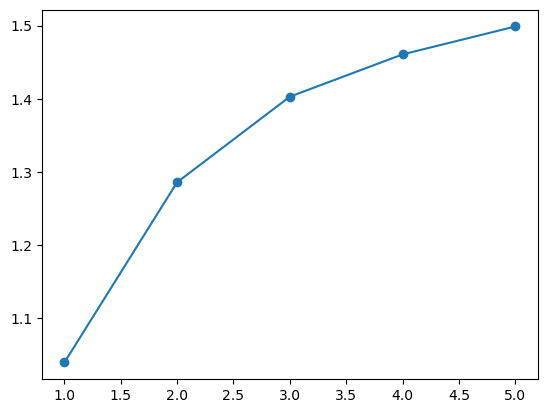

In [8]:
plt.plot(enrichments, keffs, '-o')

Running times for each simulation

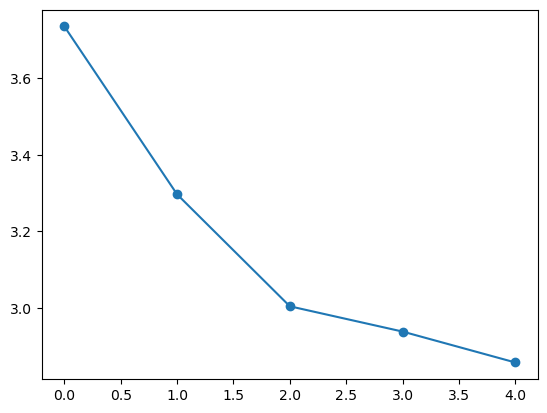

In [9]:
plt.plot(times, '-o')

Average simulation time

In [10]:
print("Average simulation time is {:.2f} seconds".format(np.average(times)))

Average simulation time is 3.17 seconds


Plotting the curve with errorbars

Plot with error = +/- 1 std_dev, confidence level is 68.27%

<ErrorbarContainer object of 3 artists>

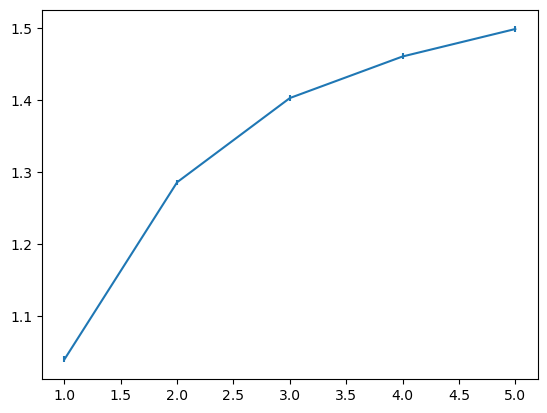

In [11]:
plt.errorbar(enrichments, keffs, yerr=std_devs)

Error = +/- 2 * std_dev, confidence level is 95.45%

<ErrorbarContainer object of 3 artists>

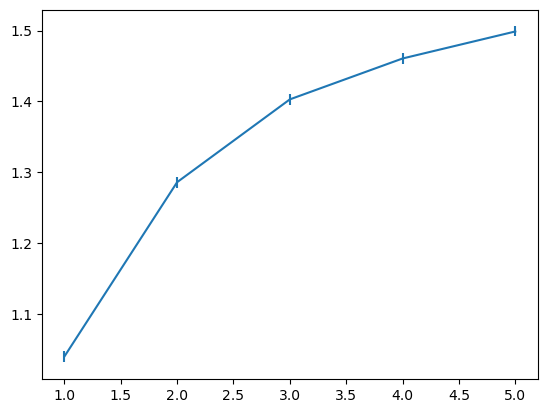

In [12]:
plt.errorbar(enrichments, keffs, yerr=2*std_devs)

Error = +/- 3 * std_dev, confidence level is 99.73%

<ErrorbarContainer object of 3 artists>

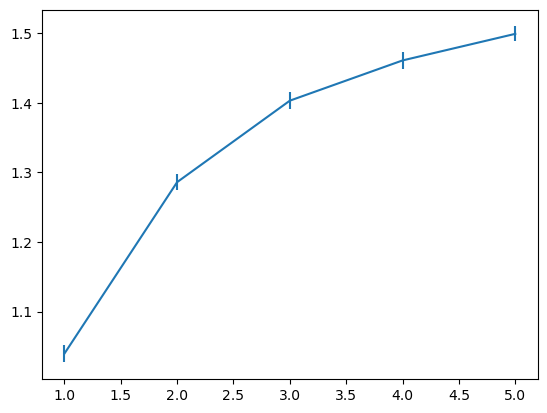

In [13]:
plt.errorbar(enrichments, keffs, yerr=3*std_devs)